<a href="https://colab.research.google.com/github/Juliaan20/Analisis-de-Datos-con-Python/blob/main/Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##MultiGraficas
def multigraf(df, coluno, coldos):
    g = sns.FacetGrid(df, col=coluno)
    g.map(sns.histplot, coldos)
    return g

#no presentar advertencias
import warnings
warnings.filterwarnings("ignore")


# Función para importar data .xlsx o .csv
def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión diferente')

#definir datos NA
def datos_NA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total Valores NA: %d" % total_na)
        print("%-20s %-15s %-10s" % ("Nombre Columna", "Valores NA", "% NA"))
        for column in df.columns:
            na_count = df[column].isna().sum()
            na_percentage = (na_count / len(df)) * 100
            print("%-20s %-15s %-10.2f%%" % (column, na_count, na_percentage))

In [ ]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(r"C:\Users\j-oso\OneDrive\Escritorio\Datasets\Ventas.csv")
print(df)

      Mes     Producto  Código vendedor    Tipo producto        Tienda  \
0       3    Televisor             3312  Entretenimiento       Zona 15   
1       7    Televisor             4976  Entretenimiento       Zona 12   
2       8       Bocina             1804  Entretenimiento     Amatitlán   
3       6  Computadora             4976         Portátil        Petapa   
4       1        Radio             5662         Portátil  Oakland mall   
...   ...          ...              ...              ...           ...   
1539    7     Cafetera             4976            Otros    Miraflores   
1540    8    Televisor             1804  Entretenimiento       Zona 12   
1541    8    Televisor             5662  Entretenimiento     Amatitlán   
1542    8       Bocina             4976  Entretenimiento        Petapa   
1543    8       Bocina             1804  Entretenimiento    La Antigua   

      Sector  Compra  Monto venta  Edad  Género  Punto de red  Frecuencia  
0          1       1          569  

In [ ]:
df

,Mes,Producto,Código vendedor,Tipo producto,Tienda,Sector,Compra,Monto venta,Edad,Género,Punto de red,Frecuencia
0,3,Televisor,3312,Entretenimiento,Zona 15,1,1,569,36,0,123739,1
1,7,Televisor,4976,Entretenimiento,Zona 12,2,0,2381,18,0,308321,1
2,8,Bocina,1804,Entretenimiento,Amatitlán,3,1,568,30,1,143096,3
3,6,Computadora,4976,Portátil,Petapa,2,1,2518,23,0,309360,4
4,1,Radio,5662,Portátil,Oakland mall,1,1,391,53,0,213568,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1539,7,Cafetera,4976,Otros,Miraflores,2,0,71,49,1,261873,4
1540,8,Televisor,1804,Entretenimiento,Zona 12,2,0,1799,21,1,246468,3
1541,8,Televisor,5662,Entretenimiento,Amatitlán,3,0,555,25,0,363237,2
1542,8,Bocina,4976,Entretenimiento,Petapa,2,0,441,58,0,202550,3


In [ ]:
# Mostrar las primeras filas del conjunto de datos
print(df.head())

   Mes     Producto  Código vendedor    Tipo producto        Tienda  Sector  \
0    3    Televisor             3312  Entretenimiento       Zona 15       1   
1    7    Televisor             4976  Entretenimiento       Zona 12       2   
2    8       Bocina             1804  Entretenimiento     Amatitlán       3   
3    6  Computadora             4976         Portátil        Petapa       2   
4    1        Radio             5662         Portátil  Oakland mall       1   

   Compra  Monto venta  Edad  Género  Punto de red  Frecuencia  
0       1          569    36       0        123739           1  
1       0         2381    18       0        308321           1  
2       1          568    30       1        143096           3  
3       1         2518    23       0        309360           4  
4       1          391    53       0        213568           2  


In [ ]:
#sacar los datos numericos:
num = [var for var in df.columns if df[var].dtype != 'object']
print('Variables numericas:\n\n',num)

Variables numericas:

 ['Mes', 'Código vendedor', 'Sector', 'Compra', 'Monto venta', 'Edad', 'Género', 'Punto de red', 'Frecuencia']


In [ ]:

df['Género'].value_counts()

# 778 Hombres
# 766 Mujeres

1    778
0    766
Name: Género, dtype: int64

In [ ]:
#identificamos los datos duplicados:
duplicados = df.duplicated().any()

#imprimimos en pantalla:
if duplicados:
    print("Existen valores duplicados")
else:
    print("No existen valores duplicados")

No existen valores duplicados


In [ ]:
#Reemplazar los valores 0 y 1 por "Femenino" y "Masculino" en la columna 'genero'
df['Género'] = df['Género'].replace({0: 'Femenino', 1: 'Masculino'})

# Verificar los cambios
print(df['Género'].value_counts())

Masculino    778
Femenino     766
Name: Género, dtype: int64


In [ ]:
df

,Mes,Producto,Código vendedor,Tipo producto,Tienda,Sector,Compra,Monto venta,Edad,Género,Punto de red,Frecuencia
0,3,Televisor,3312,Entretenimiento,Zona 15,1,1,569,36,Femenino,123739,1
1,7,Televisor,4976,Entretenimiento,Zona 12,2,0,2381,18,Femenino,308321,1
2,8,Bocina,1804,Entretenimiento,Amatitlán,3,1,568,30,Masculino,143096,3
3,6,Computadora,4976,Portátil,Petapa,2,1,2518,23,Femenino,309360,4
4,1,Radio,5662,Portátil,Oakland mall,1,1,391,53,Femenino,213568,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1539,7,Cafetera,4976,Otros,Miraflores,2,0,71,49,Masculino,261873,4
1540,8,Televisor,1804,Entretenimiento,Zona 12,2,0,1799,21,Masculino,246468,3
1541,8,Televisor,5662,Entretenimiento,Amatitlán,3,0,555,25,Femenino,363237,2
1542,8,Bocina,4976,Entretenimiento,Petapa,2,0,441,58,Femenino,202550,3


In [ ]:
#visualizar campos vacios:
datos_NA(df)

Dimensiones: 1544 filas, 12 columnas
Total Valores NA: 16
Nombre Columna       Valores NA      % NA      
Mes                  0               0.00      %
Producto             16              1.04      %
Código vendedor      0               0.00      %
Tipo producto        0               0.00      %
Tienda               0               0.00      %
Sector               0               0.00      %
Compra               0               0.00      %
Monto venta          0               0.00      %
Edad                 0               0.00      %
Género               0               0.00      %
Punto de red         0               0.00      %
Frecuencia           0               0.00      %


In [ ]:
df['Producto'].value_counts()

Bocina         342
Celular        302
Televisor      240
Computadora    223
Radio          198
Consola        109
DVD             75
Cafetera        39
Name: Producto, dtype: int64

In [ ]:
df['Género'].value_counts()

Masculino    778
Femenino     766
Name: Género, dtype: int64

In [ ]:
df['Sector'].value_counts()

3    574
2    573
1    397
Name: Sector, dtype: int64

In [ ]:
# Total de ventas por mes
ventas_por_mes = df.groupby(df['Mes'].dt.month)['Monto venta'].sum()
print("Total de ventas por mes:")
print(ventas_por_mes)
print("--------------------")

# Productos más vendidos: producto y cantidad.
productos_mas_vendidos = df.groupby('Producto')['Producto'].count().sort_values(ascending=False)
print("Productos más vendidos:")
print(productos_mas_vendidos)
print("--------------------")

# Ingresos totales por vendedor
ingresos_por_vendedor = df.groupby('Código vendedor')['Monto venta'].sum()
print("Ingresos totales por vendedor:")
print(ingresos_por_vendedor)

Total de ventas por mes:
Mes
1     1372371
12       7052
Name: Monto venta, dtype: int64
--------------------
Productos más vendidos:
Producto
Bocina         342
Celular        302
Televisor      240
Computadora    223
Radio          198
Consola        109
DVD             75
Cafetera        39
Name: Producto, dtype: int64
--------------------
Ingresos totales por vendedor:
Código vendedor
1804    411354
2422    148648
3312    170241
4976    382951
5662    266229
Name: Monto venta, dtype: int64


## Gráficos de visualización

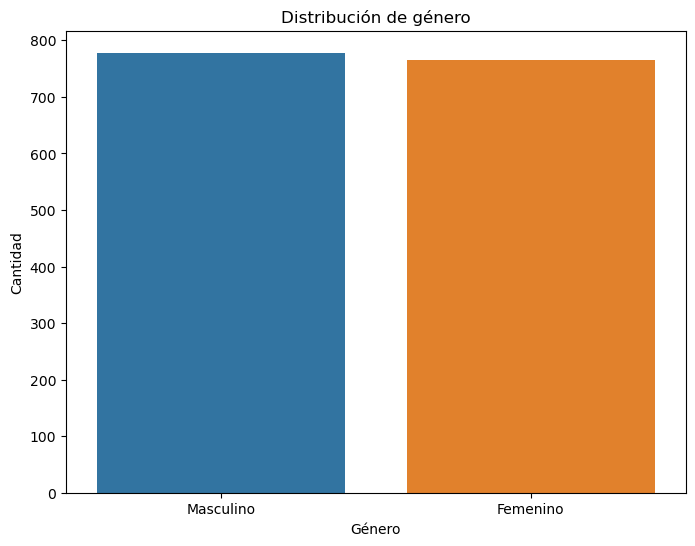

In [ ]:
# Contar los valores únicos de género
conteo_genero = df['Género'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_genero.index, y=conteo_genero.values)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de género')
plt.show()

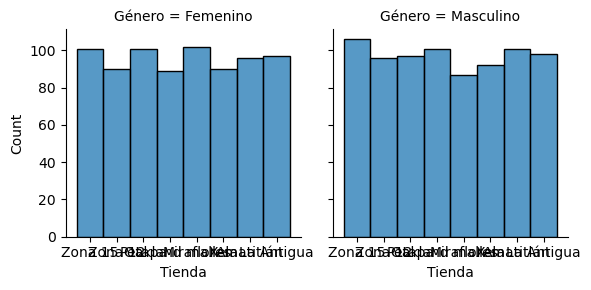

In [ ]:
multigraf(df, 'Género','Tienda')

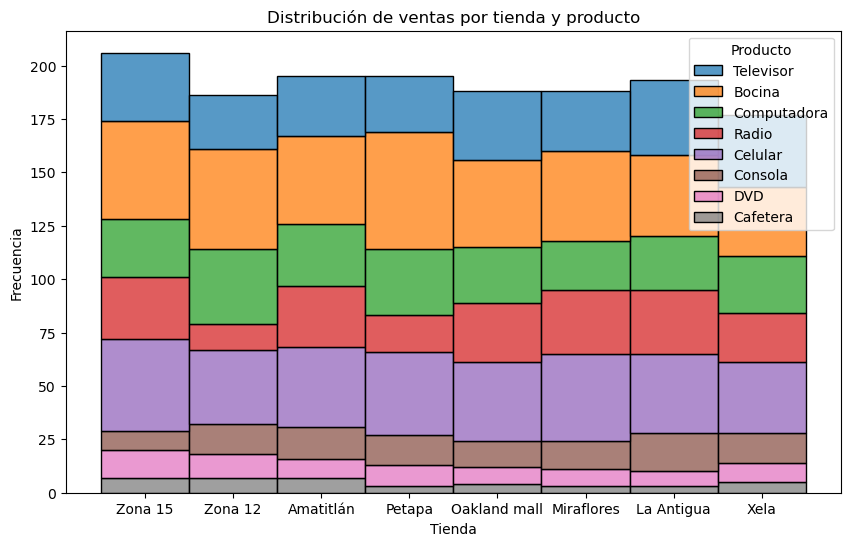

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear gráfico de distribución
sns.histplot(data=df, x='Tienda', hue='Producto', multiple='stack')

# Añadir etiquetas y título
plt.xlabel('Tienda')
plt.ylabel('Frecuencia')
plt.title('Distribución de ventas por tienda y producto')

# Mostrar gráfico
plt.show()


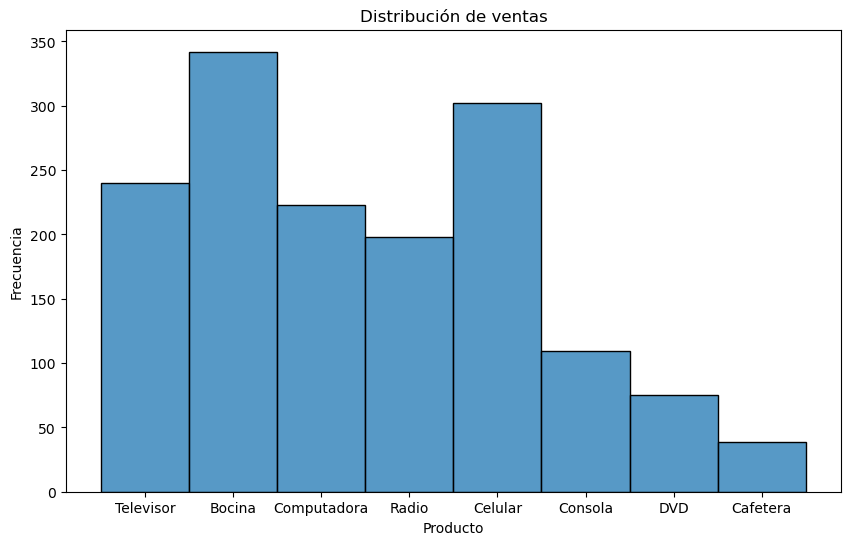

In [ ]:
# Visualizar la distribución de las ventas
import seaborn as sns

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Producto', bins=10)
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.title('Distribución de ventas')
plt.show()

# Conclusiones:

1. Esta empresa presenta dos margenes de ventas importantes en los celulares y en las bocinas por lo cual recomiendo seguir haciendo marketing para esos productos ya sea con descuentos o promociones.
2. Deben hacer un estudio de mercado en la zona 15 y replicarlos en las otras zonas.
3. Los productos DVD y Cafetera deben ser sacados del mercado dado a que estan generando bajas. Recomiento reemplazarlos por accesorios para los celulares o barras de sonido para los televisores.
4. El público masculino presenta una mayor cantidad de compras, aunque no por mucho. Recomiendo vender un poco mas de articulos de belleza para el publico femenino. esta puede generar un leve aumento en las ventas.
5. El vendedor con codigo 1804 deberia ayudar a otros vendedores, recomiendo nivelar esto para aumentar las ventas.   